# This project is about interpretable and explanable ML applications

In [103]:
import numpy as np # import the necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance
import eli5 #library for feature weight of each model.
from matplotlib import pyplot as plt # visualisation library.
from sklearn.inspection import PartialDependenceDisplay #feature partial dependence 

In [104]:
data = pd.read_csv('FIFA 2018 Statistics.csv') # load the data into pandas dataframe

In [105]:
data.info() #get overview of datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [126]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [106]:
y = (data['Man of the Match'] == 'Yes') 
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]] # pick only the columns with integer data type
X = data[feature_names] 

In [107]:
train_x , val_x, train_y, val_y = train_test_split(X, y, random_state = 1)

tree_model = DecisionTreeClassifier(random_state=0, max_depth =5,
                                   min_samples_split =5).fit(train_x, train_y)

In [108]:
y_pred = tree_model.predict(val_x)

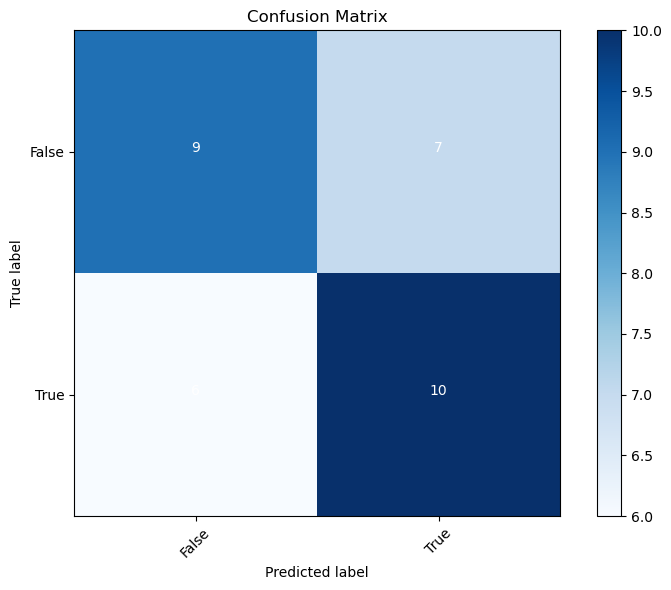

DecisionTreeClassier accuracy: 0.59375


In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `val_y` and `y_pred` contain your actual and predicted labels respectively
cm = confusion_matrix(val_y, y_pred)

# Define the class labels
classes = np.unique(val_y)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Fill the confusion matrix cells with the counts
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print('DecisionTreeClassier accuracy:', accuracy_score(val_y, y_pred))

> Accurately predicted 19 outcomes out of 32. Still poor performance, I will know why with partial dependence investigation 

In [110]:
my_model = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(train_x, train_y)

In [111]:
y_pred_rf = my_model.predict(val_x)

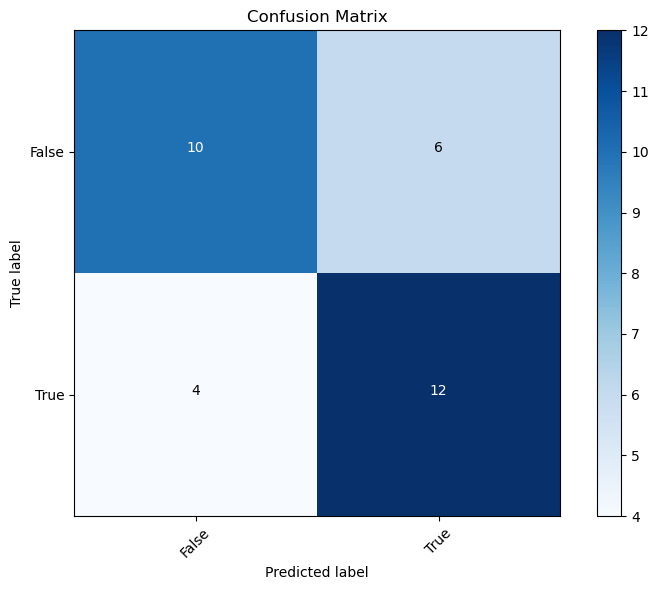

RandonForestClassifier accuracy: 0.6875


In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming `val_y` and `y_pred` contain your actual and predicted labels respectively
cm = confusion_matrix(val_y, y_pred_rf)

# Define the class labels
classes = np.unique(val_y)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Fill the confusion matrix cells with the counts
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print('RandonForestClassifier accuracy:', accuracy_score(val_y, y_pred_rf))

> Accurately predicted 22 outcomes out of 32. Still fair performance from randomforest, I will know why with partial dependence investigation plots

In [122]:
print('RandomForest feature weight table')
perm = PermutationImportance(my_model, random_state = 1).fit(val_x, val_y)
eli5.show_weights(perm, feature_names = val_x.columns.tolist())

RandomForest feature weight table


Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


Top five prediction influencers for RandomForest includes:
1. Goal Scored, 
2. Distance Covered (Kms) 
3. Yellow Card 
4. Off-Target
5. Free Kicks

In [115]:
print('DecisionTreeClassifier feature weight table')
perm_tree = PermutationImportance(tree_model, random_state = 1).fit(val_x, val_y)
eli5.show_weights(perm_tree, feature_names = val_x.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


Top five prediction influencers for DecisionTreeClassifier includes:
1. Goal Scored by a player 
2. Distance Covered (Kms) by a player
3. Red cards recieved by a player
4. Off-Targe- shots off target
5. On-Target-shots on target

# Model explanation with partial dependence plots

In [82]:
def Partial_dependence_plot(column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots for two models
    
    # Decision Tree Classifier
    disp = PartialDependenceDisplay.from_estimator(tree_model, val_x, [column], ax=axes[0])
    axes[0].set_title('Decision Tree Classifier Feature Partial Dependence')
    axes[0].set_ylim([0.0, 1.0])  # Set the y-axis limits
    
    # RandomForest Classifier
    disp = PartialDependenceDisplay.from_estimator(my_model, val_x, [column], ax=axes[1])
    axes[1].set_title('RandomForest Classifier Feature Partial Dependence')
    axes[1].set_ylim([0.0, 1.0])  # Set the y-axis limits
    
    fig.tight_layout()  # Adjust spacing between subplots
    plt.show()

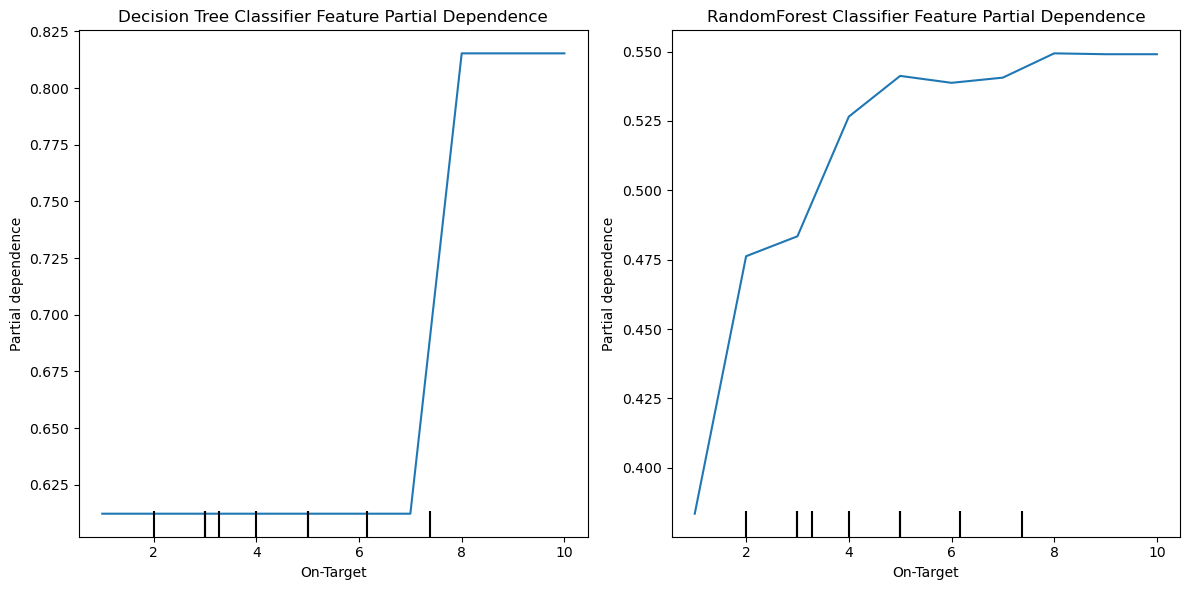

In [83]:
Partial_dependence_plot('On-Target')

>> Randomforest is less confident on __number of shots on target__ than DecisionTree classier, this allows for feature dependence flexibility in a case where a player has more shorts on target but still could not influence the outcome of the game.

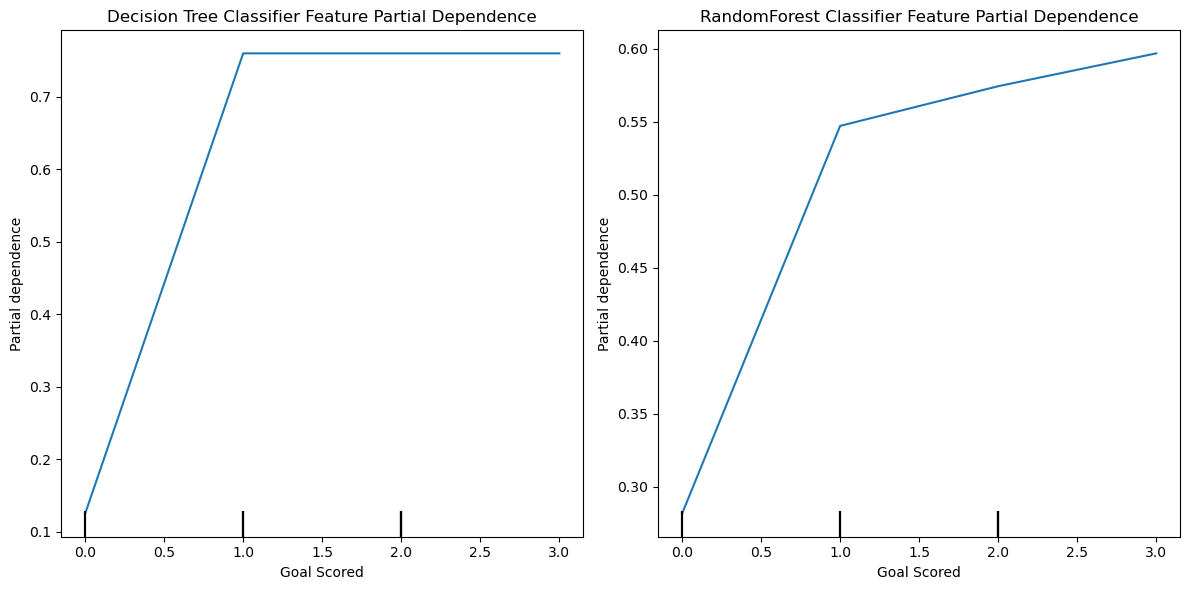

In [84]:
Partial_dependence_plot('Goal Scored')

> With a single goal from a match, DecisionTreeClassifier is almost certain to predict(70%) that a man of the march emerges, but with
RandomForestClassifier, a single goal only translates to 54% confidence that there is likely a man of the match at the end of the match.

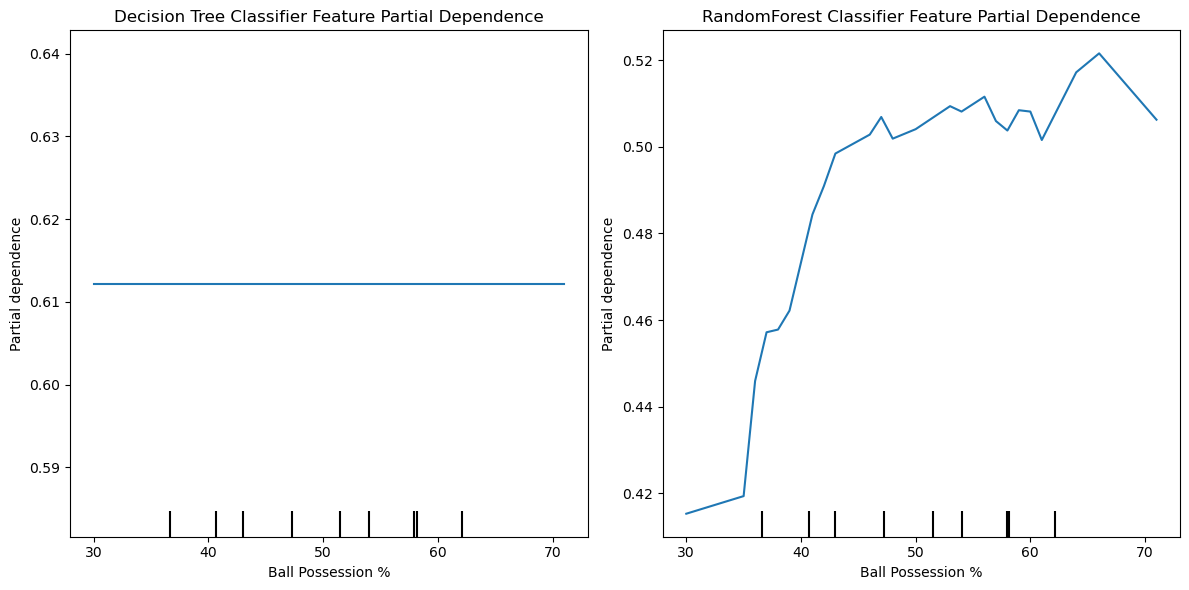

In [86]:
Partial_dependence_plot('Ball Possession %')

> DecisionTreeClassifer gives a flat partial dependence for all ball possession in predicting if a man of the match emerges-too much bias!!! Unlike RandomForest that seems to be more conservative at first and increases dependence level as the ball possession increases.

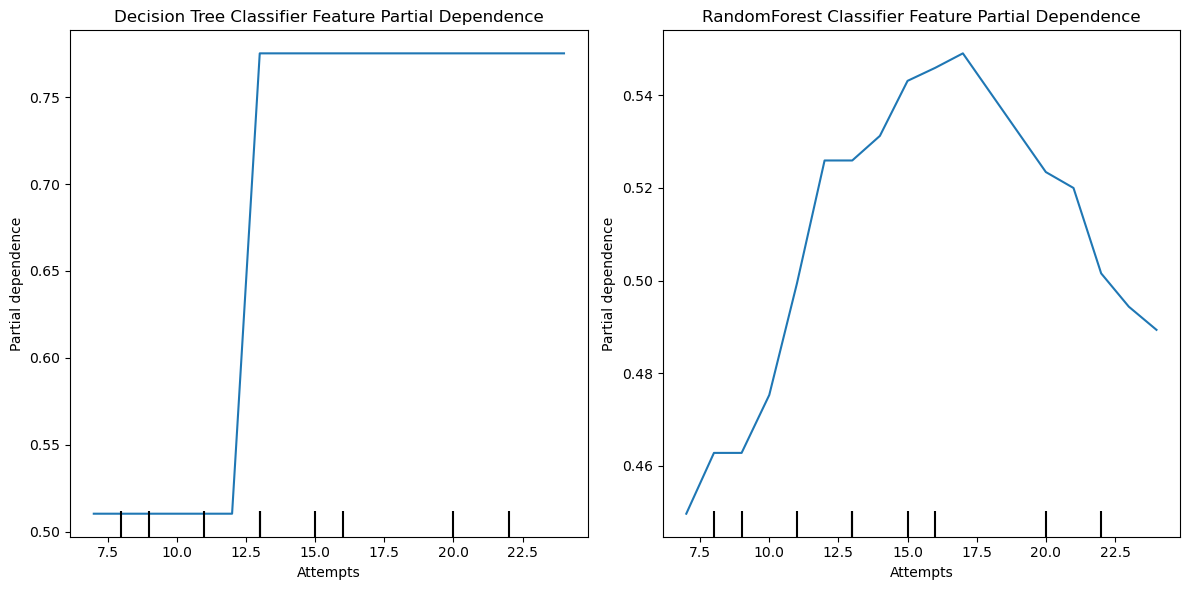

In [87]:
Partial_dependence_plot('Attempts')

> DecisionTreeClassifier appears to be so confident on producing a man of the match at number of attempts at 13+(76%). RandomForest increased and peaked at 17 attempts(55%), then declined almost linear. This could be the case of a player making so many attempts that are off target hence will not influence match outcome.

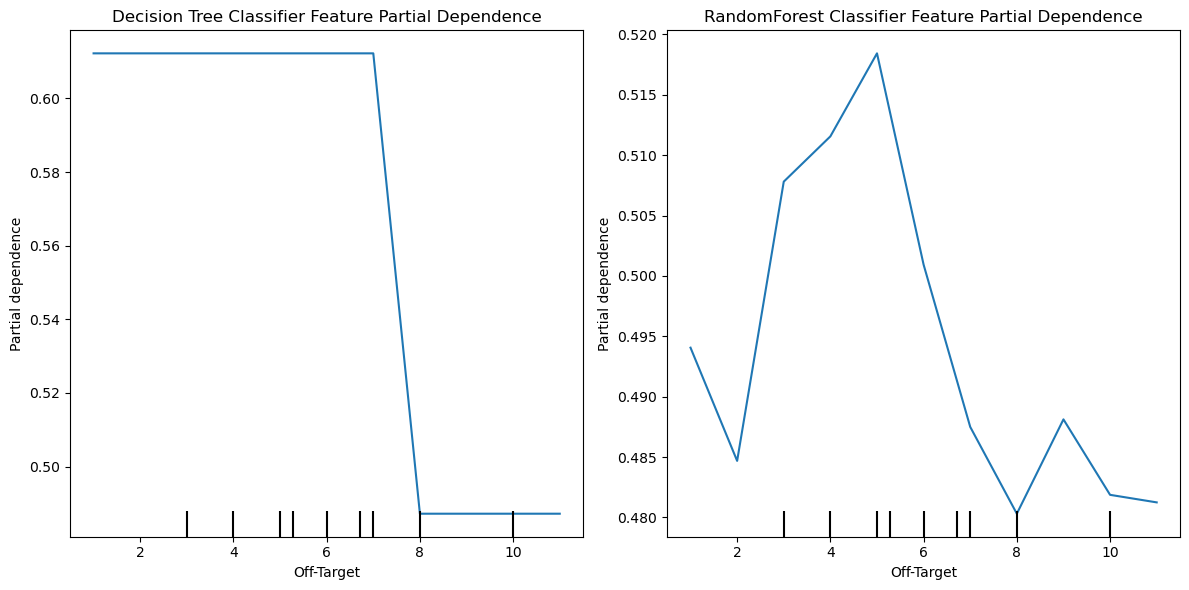

In [88]:
Partial_dependence_plot('Off-Target')

> Almost similar trend among the two models, the more the number of Off-target shots, less likely the player is to emerge man of the match.

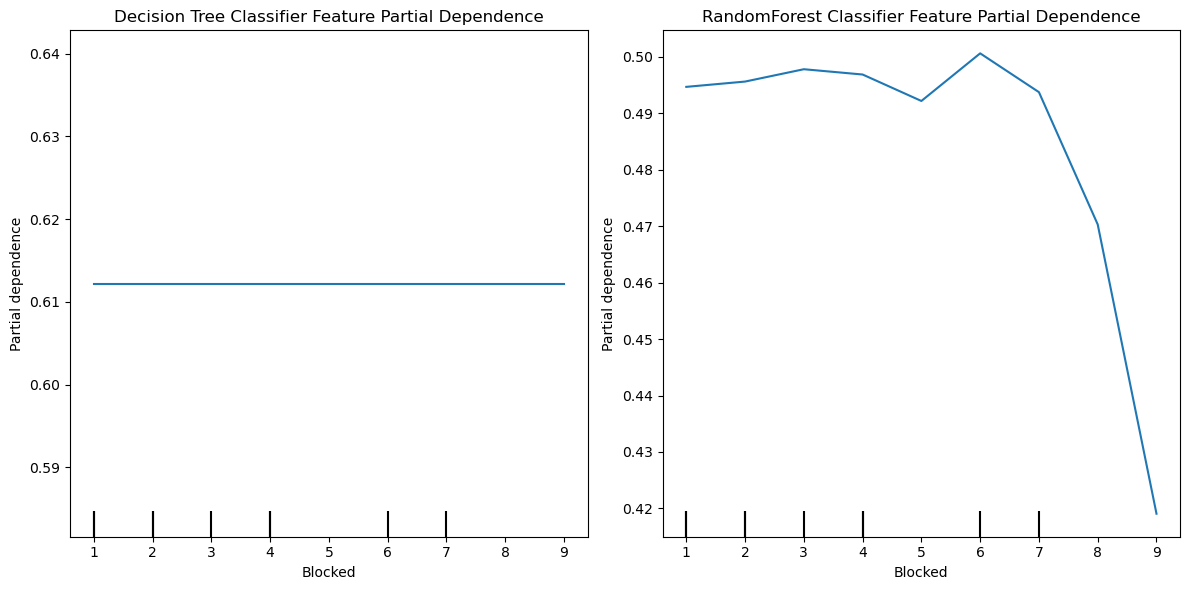

In [89]:
Partial_dependence_plot('Blocked')

>Here above, the Decision TreeClassifer attributed equal weight to all number of shots blocked(61%) by individual players, but RandomForestClassifier is saying the less the shots blocked, the more chances the player emerges man of the match. And this makes sense because if a player blocks too many shots is more likely the player is a defender, and defenders hardly emerges man of the match in real football.

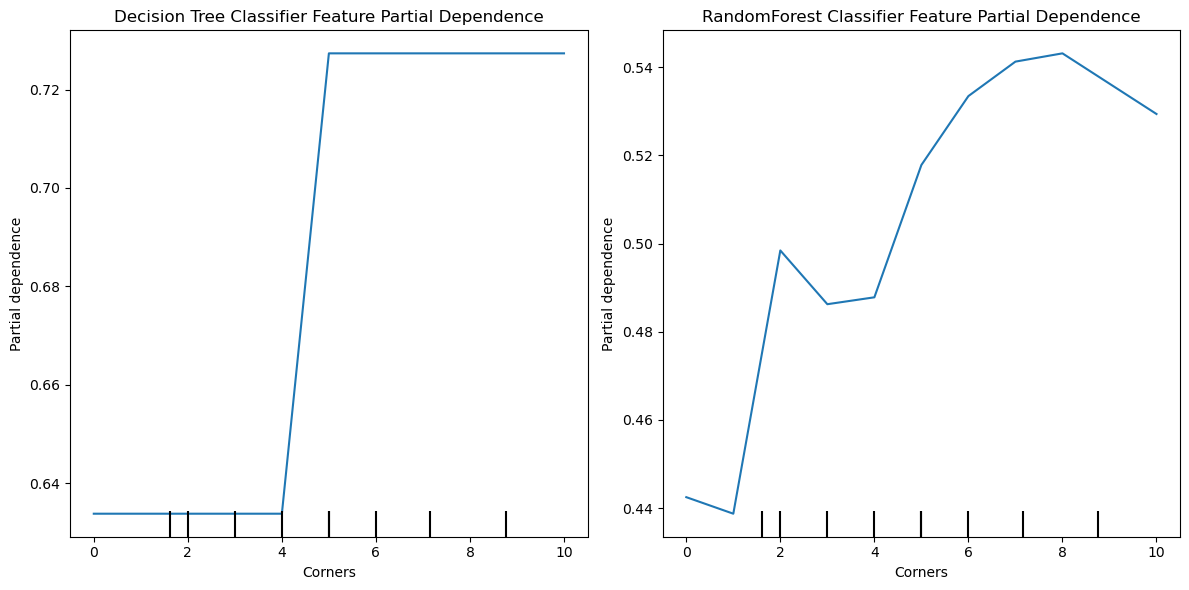

In [90]:
Partial_dependence_plot('Corners')

> DecisionTree gives over 70% partial dependence with 5 corners played by a player while randomforest is less confident with
number of corners by a player. This makes little as the more the number of corner kicks played by a player, the more likely the 
player is dictating play and more likey he will influence the match outcome.

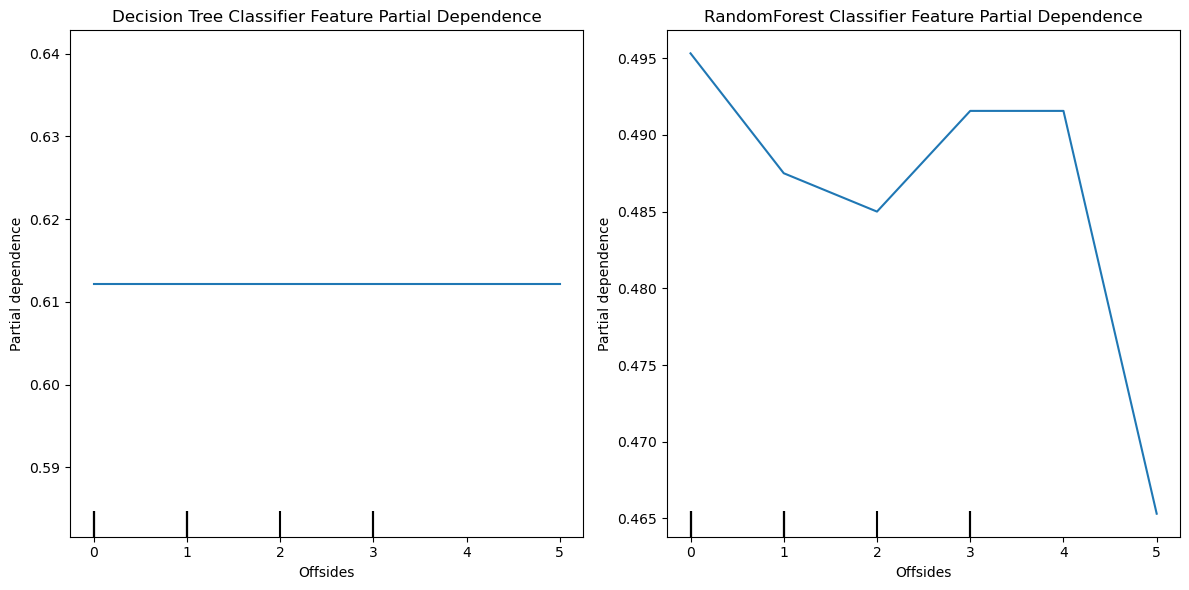

In [91]:
Partial_dependence_plot('Offsides')

> RandomForest Classifier says the more offside call on a player, the less likely he's to emerge man of the match. DecisionTree classifier is giving a flat weight to all number of offside calls. 

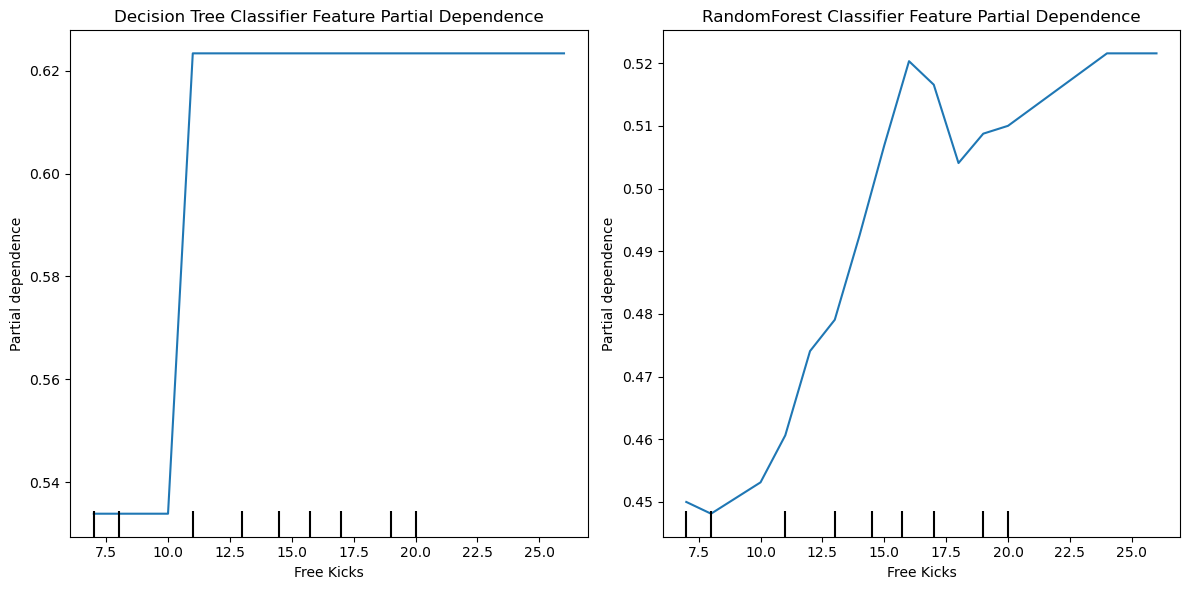

In [92]:
Partial_dependence_plot('Free Kicks')

> Generally, the more the freekicks, the more a player takes them, the more the players chances of emerging man of the match, the more chances of getting a man of the match. RandomforestClassifier almost had a linear increase in partial dependence on this feature while DecisionTreeClassifier went flat at 62%, which is way higher than the peak of Randomforest.

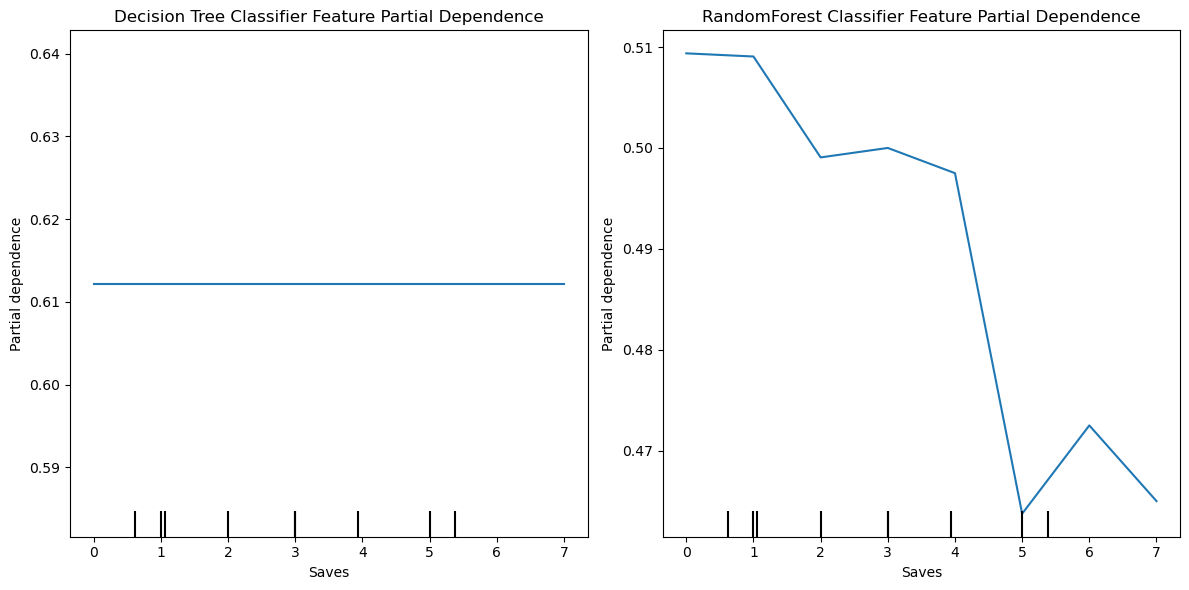

In [93]:
Partial_dependence_plot('Saves')

> RandomForest shows a negative relationship here, the more the saves the more likely the team is to produce a man of the match.
This makes real sense in the case a team has a defensive approach to the game, the less likely the team produces the man of the
match.

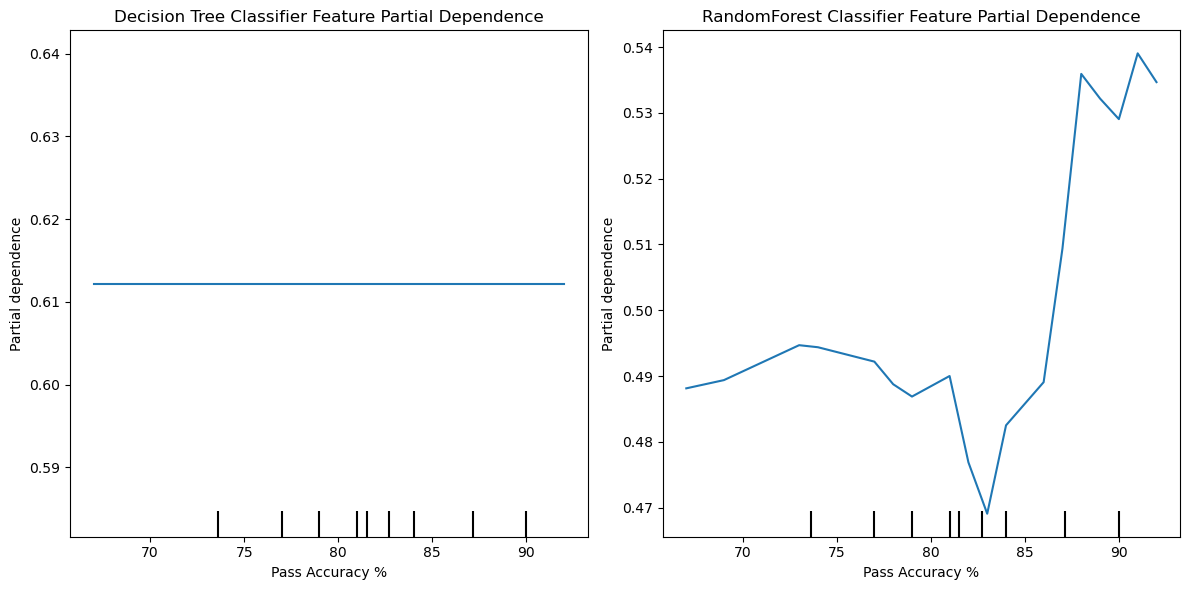

In [94]:
Partial_dependence_plot('Pass Accuracy %')

> The more a team's pass accuracy, the more likely a player from this team produces a man of the match performance, says the average trend of Randomforestcalssifier. DecisionTreeClassifier could not pick any effect of this feature on the target variable, hence the flat dependency trend.

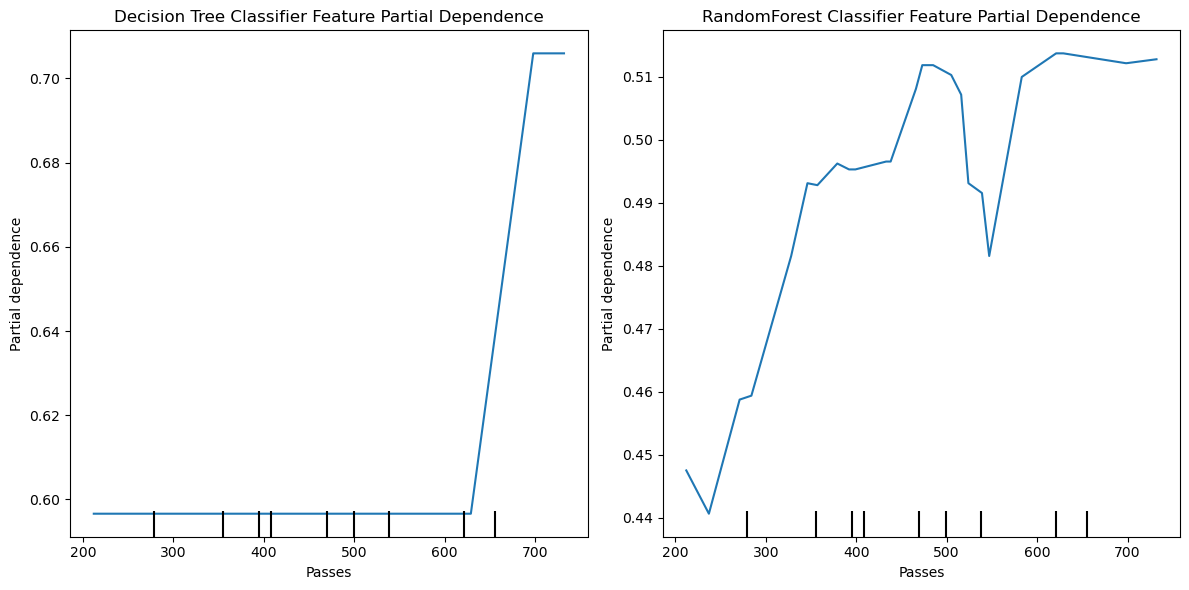

In [96]:
Partial_dependence_plot('Passes')

> The more the number of passes by a team, the more likely the team produces a man of the match. This makes sense in a team with good playmaker who connects the dots in those passes, hence would likely become the man of the match at the end.

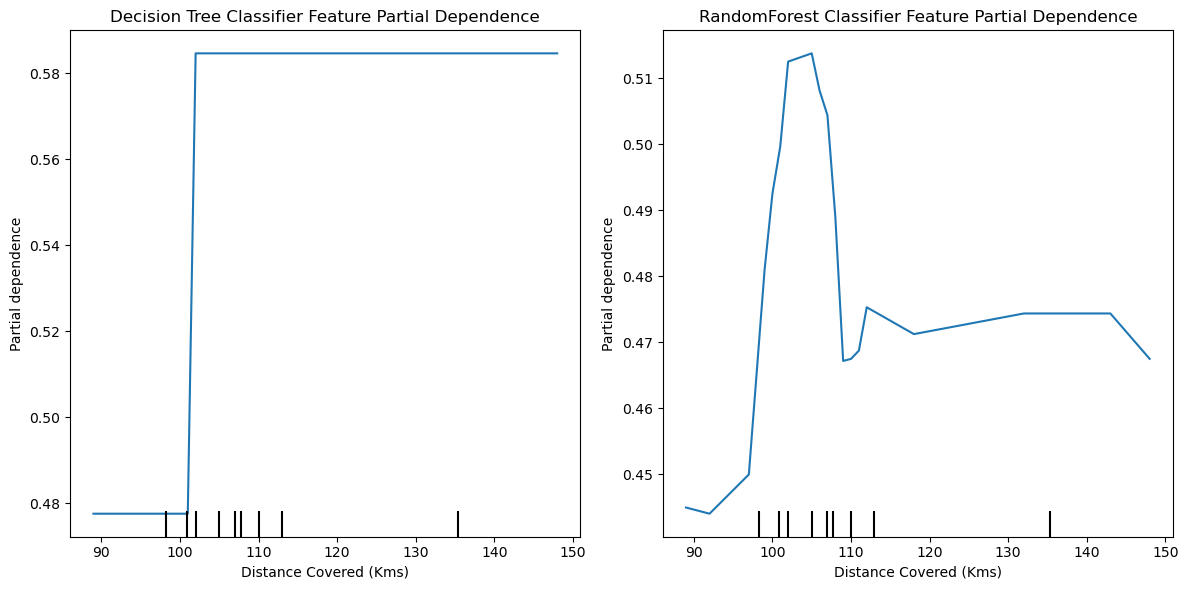

In [97]:
Partial_dependence_plot('Distance Covered (Kms)')

In [ ]:
Distance covered by whole team do not have much significant pattern of effect on the partial dependence of the model prediction.

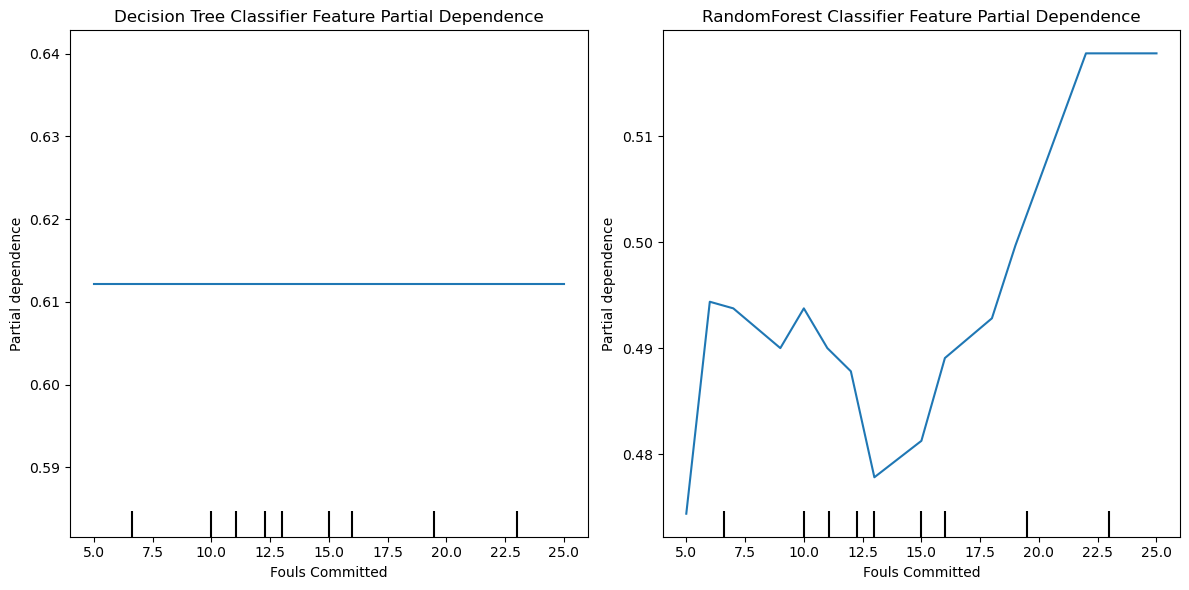

In [98]:
Partial_dependence_plot('Fouls Committed')

> RandomforestClassifier: This could well mean the more the fouls committed, the more the foul play is directed towards a particular player in 
the opponent team who is dictating the play and impacting the outcome of the game. Hence the player drawing the fouls will
likely emerge man of the match at the end.This requires more data to backup

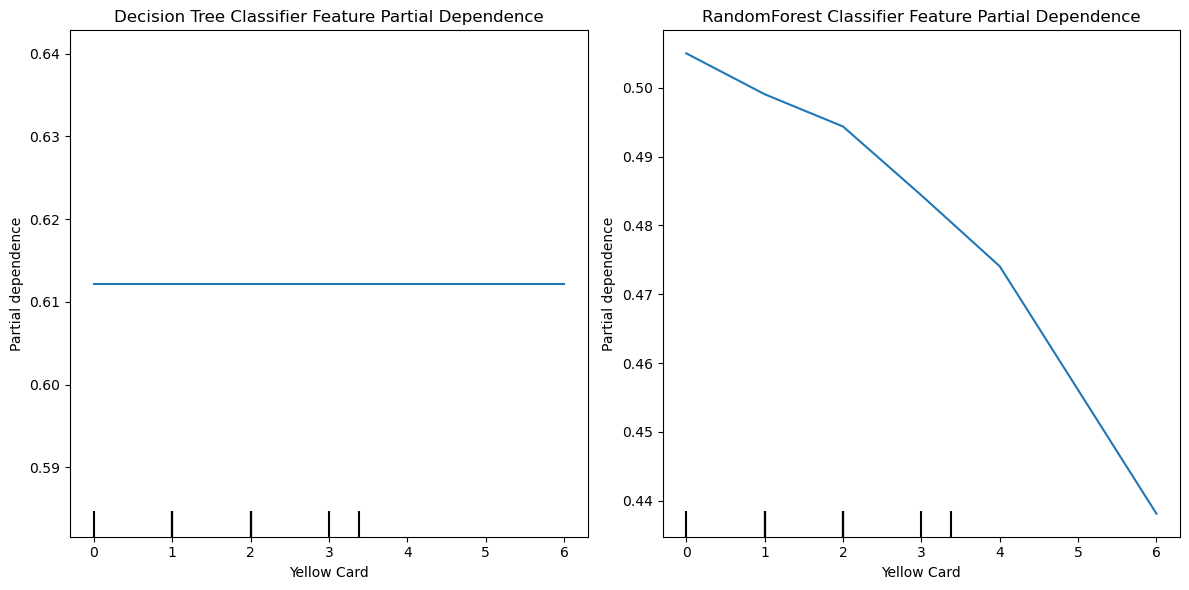

In [99]:
Partial_dependence_plot('Yellow Card')

> The more the yellow cards produced in the game, the less likely a man of the match emerges, from the RF model partial dependence
on this feature.

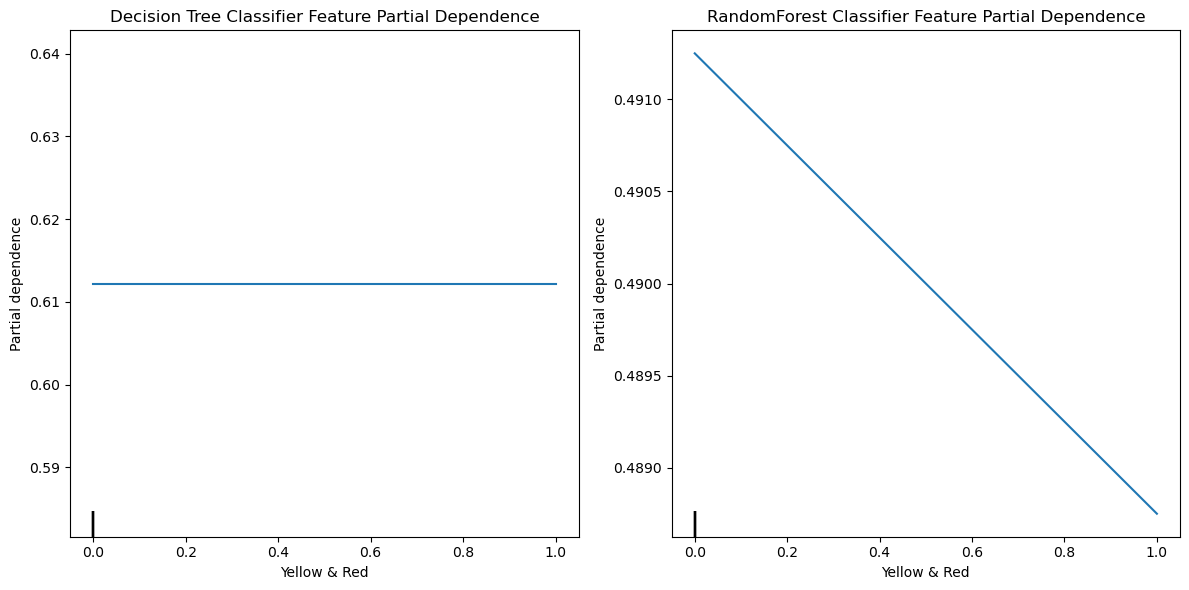

In [100]:
Partial_dependence_plot('Yellow & Red')

> Negative relation, the more the Yellow & red card from a game, the less likely the game produces a man of the match.

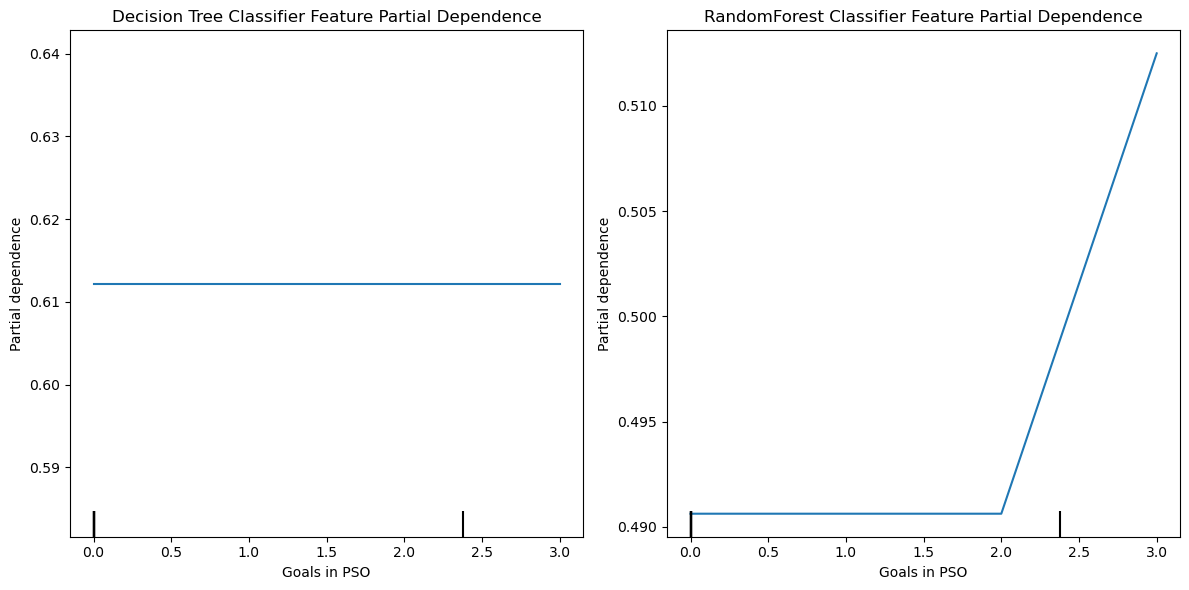

In [102]:
Partial_dependence_plot('Goals in PSO')

In [ ]:
RandomForest Classifier shows there is a positive correlation between PSO(penalty shoot out) and the partial dependence score.

# Conclusion
> Randomforest Classifier has proven to show more relationship between it's feature level decision making(weight assignment) and the real case study of football match in reality, it outperformed decisiontreeclassifier. Hence my choice of algorithm